In [ ]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [ ]:
max_rate = 200

np.random.seed(48)
# draw samples from a random poisson distribution for the rate of the neuron
# in both cases
Poisson1 = np.random.poisson(lam=40, size=1000000)
Poisson2 = np.random.poisson(lam=80, size=1000000)

# 200 Hz - upper boundary, keep only samples under 200
samples1 = [x for x in Poisson1 if x<=max_rate] 

samples2 = [x for x in Poisson2 if x<=max_rate]

In [ ]:
p1, p2 = [], []

# calculate the percentage (probability) that each unique value appears in the random data
for q in np.unique(samples1):
    p1.append(samples1.count(q)/len(samples1))

for u in np.unique(samples2):
    p2.append(samples2.count(u)/len(samples2))


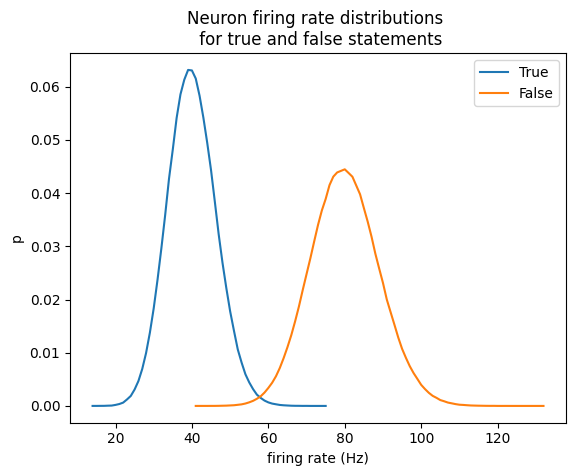

In [ ]:
# plot the samples drawn from the distributions
plt.plot(np.unique(samples1), p1, label='True')
plt.plot(np.unique(samples2), p2, label='False')

plt.title('Neuron firing rate distributions \n for true and false' \
' statements')
plt.xlabel('firing rate (Hz)')
plt.ylabel('p')
plt.legend()

Text(0, 0.5, 'True Positive Probability')

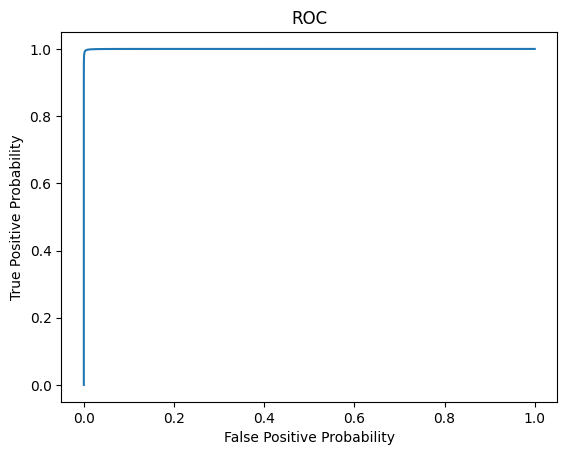

In [ ]:
all_samples = samples1 + samples2
all_unique = np.unique(all_samples)
TP, FP = [], []

# Go through the unique values in both distributions as critical Zs
for i in all_unique: 
    TP.append(sum(np.array(p2)[np.where(np.unique(samples2)>=i)[0].astype(int)])) # sum the probabilities of all values in samples 2 that are greater than critical value (i)
    FP.append(sum(np.array(p1)[np.where(np.unique(samples1)>=i)[0].astype(int)])) # sum the probabilities of all values in samples 1 that are greater than critical value (i)

plt.plot(FP, TP)
plt.title('ROC')
plt.xlabel('False Positive Probability')
plt.ylabel('True Positive Probability')

In [ ]:
# Find the area under the ROC curve using an integral
AUC = integrate.trapezoid(y=np.sort(TP), x=np.sort(FP))
print(f'The overall probability for success is: {AUC}')

The overall probability for success is: 0.9998891872250004
